In [1]:
import numpy as np

every_hits_data = np.load('data/every_hits.npz', allow_pickle=True)

In [23]:
evt = every_hits_data['every_hit'][4]

In [24]:
import pandas as pd

df = pd.DataFrame(evt).sort_values('time')

In [25]:
time_slices = np.linspace(df.time.min(), df.time.max(), 50)

indices = []

for i in range(49):
    indices.append(
        df[(df['time'] < time_slices[i+1]) & (time_slices[i] <= df['time'])].index
    )

In [26]:
imgs_for_anim = np.zeros((49, 20, 20))

for i in range(len(time_slices)-1):
    imgs_for_anim[i, :, :] += imgs_for_anim[i-1, :, :]
    for index in df.iloc[indices[i]].index:
        imgs_for_anim[i, int(df.iloc[index]['ix']), int(df.iloc[index]['iy'])] += 1

In [27]:
import plotly.express as px

fig = px.imshow(imgs_for_anim,
                animation_frame=0,
                zmax=30,
                color_continuous_scale='inferno',
                labels=dict(
                    animation_frame="Time slice",
                    color='nHits'
                ),
                title=f'Time from {round(df.time.min(), 2)} ns to {round(df.time.max(), 2)} ns'
)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 100

fig.show()

<AxesSubplot:ylabel='Frequency'>

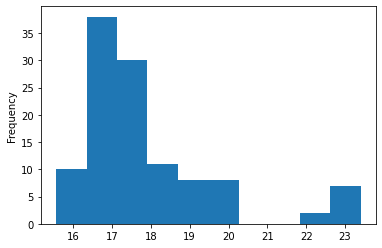

In [31]:
df['time'].plot(kind='hist', bins=10)